# Introduction to Regression with Nueral Networks in Tensorflow

There are many definitions for a regression problem, but In our case, we're going to  simplify it:
predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [96]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.11.0


## Creating data to view and fit

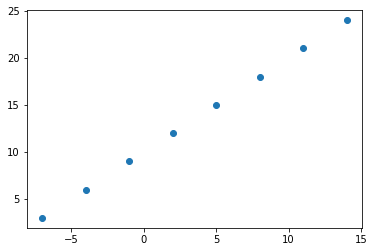

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize
plt.scatter(X, y)

In [98]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [99]:
# Create demo tensor for a housing price prediciton problem
house_info = tf.constant(["bedroom", 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [100]:
input_shape = X[0].shape
output_shape = y[0].shape
# Scalar, not tensor
input_shape, output_shape, X[0].ndim

((), (), 0)

In [101]:
X[0], y[0]

(-7.0, 3.0)

In [102]:
# Turn our numpy arrays to tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [103]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with Tensorflow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels)

In [104]:
X, tf.expand_dims(X, axis=-1)

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>)

In [105]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# layers can be added to model using `model.add`

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # Means abosulte error
    optimizer=tf.keras.optimizers.SGD(), # Short for stochastic gradient descent
    metrics=["mae"]
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 400ms/step - loss: 14.7193 - mae: 14.7193
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 14.5868 - mae: 14.5868
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 14.4543 - mae: 14.4543
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 14.3218 - mae: 14.3218
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 14.1893 - mae: 14.1893


In [106]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [107]:
# Making a prediction using our model
y_pred = model.predict(tf.constant([0, 17]))
y_pred

1/1 [==============================] - 0s 57ms/step


array([[ 0.05     ],
       [-2.8974254]], dtype=float32)

## Improving our model

we can improve our model, by altering the steps we took to create a model

1. Creating a model - here we might add more layers, increase the number of hidden units (nuerons) within each of the hidden layers, change the activation function of each layer

2. Compiling a model - here we might change the optimization funciton or perhaps the learning rate of the opimization funciton.

3. Fitting a mdoel - here we might a fit a model for more epochs

In [108]:
# 1. Create a model (spicified to your probelm)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation=None))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    # Learning rate is one of the most improtant parameters 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
    metrics=["mae"]
)

# Fit the model
model.fit(
    tf.expand_dims(X, axis=-1), 
    y, 
    epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.2499 - mae: 13.2499
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.1692 - mae: 12.1692
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0855 - mae: 11.0855
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 9.9918 - mae: 9.9918
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 8.8817 - mae: 8.8817
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 7.7501 - mae: 7.7501
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 6.8188 - mae: 6.8188
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.1232 - mae: 7.1232
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.5610 - mae: 7.5610
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 7.7630 - mae: 7.7630
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - 

In [109]:
# Making a prediction using our model
y_pred = model.predict(tf.constant([0, 17]))
y_pred

1/1 [==============================] - 0s 84ms/step


array([[10.008596],
       [27.732702]], dtype=float32)

## Evaluating a model

In pracitce, a typical workflow you'll go through when building neural network is:

```
Build a model -> Fit it -> evaluate it -> tweak a model -> fit it -> evauate it -> tweak a model -> fit it -> evalate it ...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predicitons of the model - how do the predicitons of a model line up against the ground truth

In [110]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [111]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

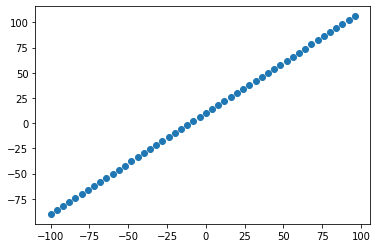

In [112]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets
* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Evaluation set - the model gets tuned on this data, which is typically 10-15% of the data available 
* Test set - the model gets evaluated o this data to test what it has learned, this set is typically 10-15% of the total data available 

In [113]:
# Check the length of how many samples we have
len(X) 

50

In [114]:
# Split the data into train and test sets
X_train = X[:40] # First 40 are training sample (80% of the data)
X_test = X[40:] # The last 10 are the testing samples (20% of the data)

y_train = y[:40]
y_test = y[40:]

### Visualizing the data

Now we've got our data in training and test sets... let's visualize again

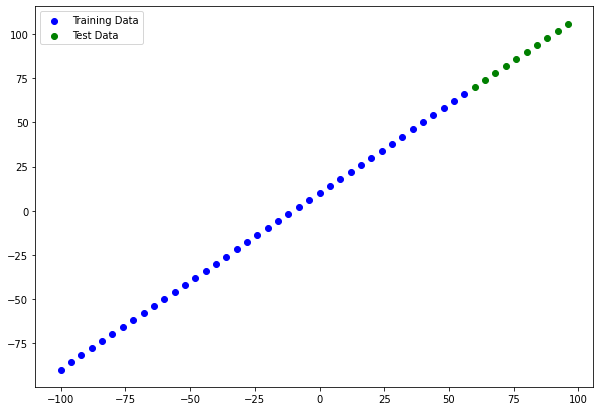

In [115]:
plt.figure(figsize=(10, 7))
# Plot training data
plt.scatter(X_train, y_train, c="b", label="Training Data")
# Plot test data
plt.scatter(X_test, y_test, c="g", label="Test Data")
# show legend
plt.legend()

In [116]:
# Let's have a look at how to build a neural network for our data

# 1. create a model
model = tf.keras.Sequential(name="Model")
model.add(tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"))
model.add(tf.keras.layers.Dense(1, input_shape=[1], name="output_layer"))

# 2. Comiple the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"],
)

model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Dense - inter connected, a layer where every node is connected to every other node
* Total params - total number of parameters
* Trainable parameters - there are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters aren't udpated during training (this is typical when you bring in already learned model from transfer learning)

In [117]:
# 3. Fitting model
model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=0
)

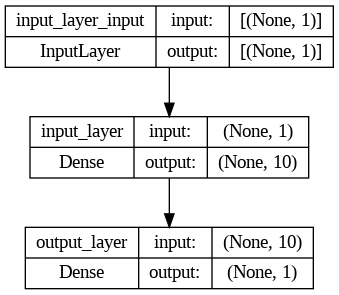

In [118]:
from IPython.utils.wildcard import show_hidden
# Visualize model
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing our models' predictions

To visualize predictions, it's good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus you model predicitons)

In [119]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 45ms/step


array([[ 78.40218 ],
       [ 83.50976 ],
       [ 88.61735 ],
       [ 93.724915],
       [ 98.832504],
       [103.94007 ],
       [109.04765 ],
       [114.155235],
       [119.26281 ],
       [124.370384]], dtype=float32)

In [120]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [121]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train,test_data=X_test, test_labels=y_test, predictions=y_pred):
  """
  Plots training data, test data, and compares predictions to ground truth
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predicitions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show legend
  plt.legend()



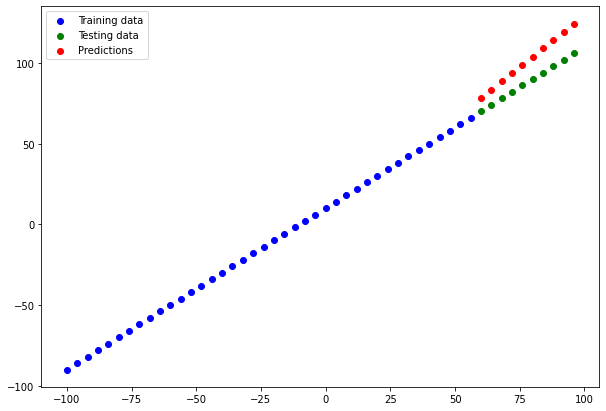

In [122]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE: mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE -mean square error, "Square the average errors"

In [123]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test) # Loss and metrics values

1/1 [==============================] - 0s 97ms/step - loss: 13.3863 - mae: 13.3863


[13.386285781860352, 13.386285781860352]

In [124]:
y_test.shape, y_pred.shape, tf.squeeze(y_pred).shape

(TensorShape([10]), (10, 1), TensorShape([10]))

In [125]:
# Calcualte the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
# Must be in the same shape, squeezing to get rid of the 1-dimension
mae

<tf.Tensor: shape=(), dtype=float32, numpy=13.386286>

In [126]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=189.31317>

In [127]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))

### Running experiments to improve our model

1. Get more data - get more examples for your model to train on and learn teh patterns or relationships between features and labels

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer

3. Train for longer - give you model more of a chance to find patterns in data

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.

2. `model_2` - 2 layers, trained for 100 epochs

3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [128]:
tf.random.set_seed(42)

# 1. create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. fit the mdoel
model_1.fit(
    tf.expand_dims(X_train, axis=-1), 
    y_train, 
    epochs=100, 
    verbose=0
    )

1/1 [==============================] - 0s 42ms/step


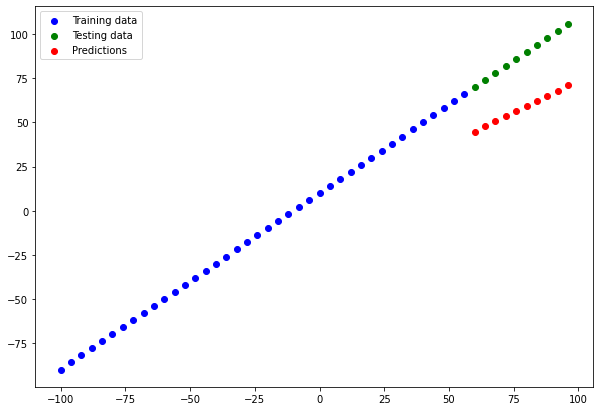

In [129]:
# Make and plot predicitons for model 1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [130]:
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.093225>,
 <tf.Tensor: shape=(), dtype=float32, numpy=915.5394>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [131]:
tf.random.set_seed(42)

# 1. create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. fit the mdoel
model_2.fit(
    tf.expand_dims(X_train, axis=-1), 
    y_train, 
    epochs=100, 
    verbose=0
    )

1/1 [==============================] - 0s 45ms/step


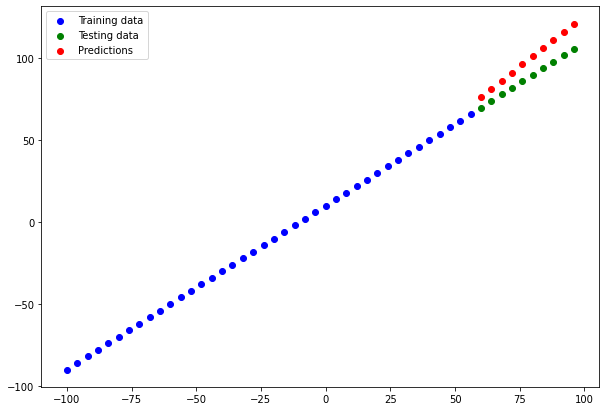

In [132]:
# Make and plot predicitons for model 2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [133]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.856083>,
 <tf.Tensor: shape=(), dtype=float32, numpy=125.77444>)

**Build `model_3`**

2 dense layers, trained for 500 epochs

In [134]:
tf.random.set_seed(42)

# 1. create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. fit the mdoel
model_3.fit(
    tf.expand_dims(X_train, axis=-1), 
    y_train, 
    epochs=500, 
    verbose=0
    )

1/1 [==============================] - 0s 66ms/step


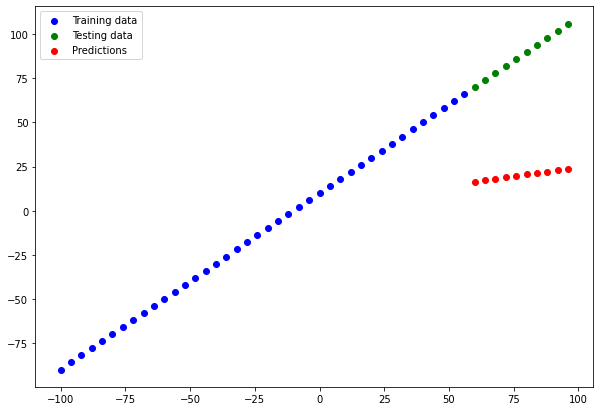

In [135]:
# Make and plot predicitons for model 1
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [136]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.89635>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4694.2046>)

In [137]:
# Let's compare our models' results using a pandas Dataframe
import pandas as pd

model_results = [
    ["model_1", mae_1.numpy(), mse_1.numpy()], 
    ["model_2", mae_2.numpy(), mse_2.numpy()], 
    ["model_3", mae_3.numpy(), mse_3.numpy()]
]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.093225,915.539429
1,model_2,10.856083,125.774437
2,model_3,67.896347,4694.204590


Looks like `model_2` performed the best

In [138]:
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 10)                20        
                                                                 
 dense_32 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


One of the main goals should be to minimize the time between experiments.
The more experiments you do, the more things you'll figure out which don't work, and in turn, get closer to figuring out what does work.

## Tracking you experiments

One really good habit in machine learning is to track the results of yor experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Tools to help:
* Tensorboard - a component of TensorFlow library to help track Modelling experiments
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs into tensorboard)


## Saving Models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) 

There are two main formats we can save our model's to:
1. The SavedModel format
2. The HDF5 format

In [139]:
# Save model
model_2.save("best_model_SaveModel_format")

In [140]:
# Save model using HDF5 format
model_2.save("best_model_HDF5_format.h5")  

## Loading in saved models

In [141]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('best_model_SaveModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 10)                20        
                                                                 
 dense_32 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [142]:
# Compare model_2 predictions with SavedModel format predictions
loaded_SavedModel_format.predict(X_test) == model_2.predict(X_test)

1/1 [==============================] - 0s 40ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [143]:
# Load in a model using the .h5 format
loaded_h5_models = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_models.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 10)                20        
                                                                 
 dense_32 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [144]:
# Compare model_2 predictions with HDF5 format predictions
loaded_h5_models.predict(X_test) == model_2.predict(X_test)

1/1 [==============================] - 0s 25ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Downlaod a model (or any other file) from Google Colab

If you want to download your file from Google Colab:
1. You can go download them from files tab.
2. You can copy them to the mounted drive
3. Use code (See cell below)

In [145]:
# Downlaod a file fro Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [146]:
# Save a file from Google Colab to Google drive
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/ML

## A Larger Example

In [147]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [148]:
insurance['sex'].dtype

dtype('O')

In [149]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [150]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']
X.head(), y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [151]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [152]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

In [153]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8478.9609 - mae: 8478.9609


[8478.9609375, 8478.9609375]

In [154]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Models doesn't look to be performing well, improving it

In [163]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=["mae"]
)

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [164]:
# Check the results of the insurance model on the test data
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3393.1965 - mae: 3393.1965


[3393.196533203125, 3393.196533203125]

In [181]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [182]:
# Check the results of the insurance model on the test data
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.7434 - mae: 3491.7434


[3491.743408203125, 3491.743408203125]

Text(0.5, 0, 'epochs')

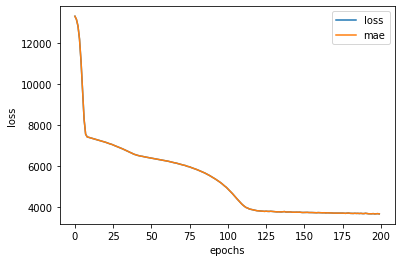

In [183]:
# Plot history (AKA a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

**EarlyStoppingCallback**: A Tensorflow component you can add to the model to stop the training once it stops improving

## Preprocessing data (normalization and standardization)

<Axes: ylabel='Frequency'>

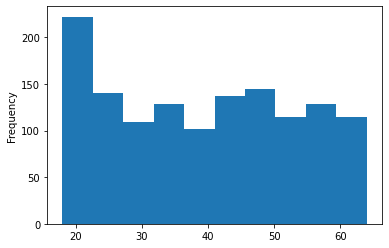

In [185]:
X["age"].plot(kind='hist')

<Axes: ylabel='Frequency'>

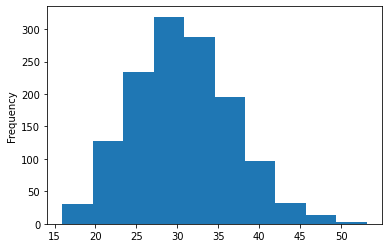

In [186]:
X["bmi"].plot(kind='hist')

In [187]:
X['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Scaling type | what is does | Scikit-learn funciton | when to use
------|------|------|------
**Scale** (also referred to as normalisation) | Converts allvalues to between 0 and 1 whilst preserving the original distribution | MinMaxScaler | Use as default scaler with neural networks
**Standardization** | removes the mean and divides each value by the standard deviation | StandardScaler | Tranform a feature to have close to normal distribution (caution: this reduces the effect of outliers)

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can  borrow a few classes from Scikit learn

In [193]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer (
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaller) and oneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [200]:
# What doe sthe data look like
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [197]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [198]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [213]:
# Build a neural network model to fit on our normalized data

# 1. Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# 3. Fit the model
history = insurance_model_4.fit(
    X_train_normal,
    y_train,
    epochs=100,
    verbose=0
)

In [214]:
# Evaluate model
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 1s 12ms/step - loss: 3438.3525 - mae: 3438.3523


[3438.3525390625, 3438.352294921875]

Text(0, 0.5, 'loss')

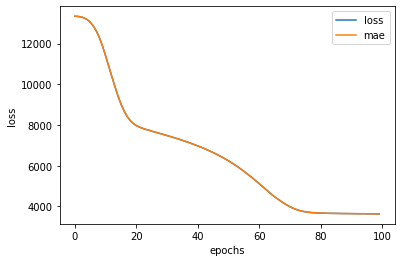

In [215]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")